Recreate the graph provided, you will need to create two conditional edges

input:

initial_state = AgentState(number1 = 10, operation1 = "-", number2 = 5, number3 = 7, number4 = 2, operation2 = "+", finalNumber = 0, finalNumber2 = 0)

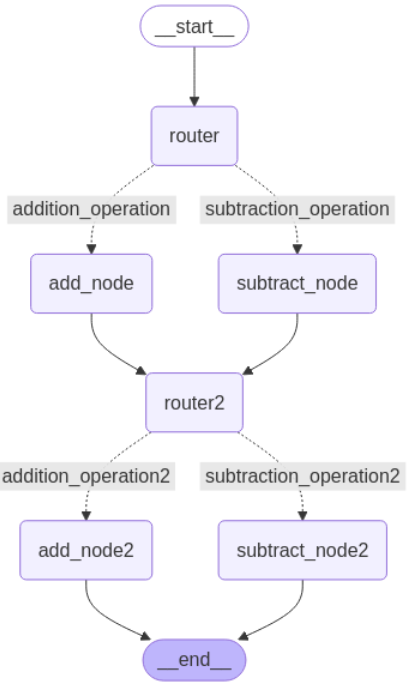

In [9]:
from IPython.display import Image, display

display(Image(filename='imgs/04_graph.png'))

In [10]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END


In [11]:
class AgentState(TypedDict):
    number1: str
    operation1: str
    number2: str
    operation2: str
    number3: str
    number4: str
    finalNumber: str
    finalNumber2: str


In [12]:
def adder(state:AgentState) -> AgentState:
    """
    This node adds the 2 numbers
    """

    state["finalNumber"] = state["number1"] + state["number2"]

    return state

def substractor(state:AgentState) -> AgentState:
    """
    This node substracts the 2 numbers
    """

    state["finalNumber"] = state["number1"] - state["number2"]

    return state

def decide_next_node(state:AgentState) -> AgentState:
    """
    This node will select the next node of the graph
    """

    if state["operation1"] == "+":
        return "addition_operation" # the edge not the function!
    
    elif state["operation1"] == "-":
        return "substraction_operation" # the edge not the function!

    return state

In [13]:
def adder2(state:AgentState) -> AgentState:
    """
    This node adds the 2 numbers
    """

    state["finalNumber2"] = state["finalNumber"] + state["number3"] + state["number4"]

    return state

def substractor2(state:AgentState) -> AgentState:
    """
    This node substracts the 2 numbers
    """

    state["finalNumber2"] = state["finalNumber"] - state["number3"] - state["number4"]

    return state

def decide_next_node2(state:AgentState) -> AgentState:
    """
    This node will select the next node of the graph
    """

    if state["operation2"] == "+":
        return "addition_operation2" # the edge not the function!
    
    elif state["operation2"] == "-":
        return "substraction_operation2" # the edge not the function!

    return state

In [14]:
graph = StateGraph(AgentState)

graph.add_edge(START, "router")
# our input state will be our output state. We are comparing inside decide_next_node
# we are not changing the state
graph.add_node("router", lambda state:state) 

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
    # this is in a format edge: Node
    "addition_operation": "add_node",
    "substraction_operation": "substract_node"
    }
    )
graph.add_node("add_node", adder)
graph.add_node("substract_node", substractor)

graph.add_edge("add_node", "router2")
graph.add_edge("substract_node", "router2")

graph.add_node("router2", lambda state:state) 


graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
    # this is in a format edge: Node
    "addition_operation2": "add_node2",
    "substraction_operation2": "substract_node2"
    }
    )

graph.add_node("add_node2", adder2)
graph.add_node("substract_node2", substractor2)


graph.add_edge("add_node2", END)
graph.add_edge("substract_node2", END)

app = graph.compile()

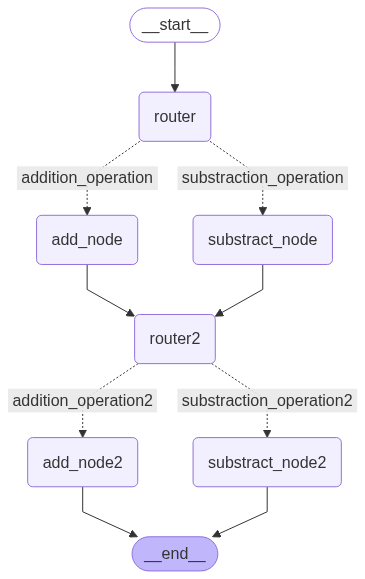

In [15]:
# display the graph created

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
initial_state = AgentState(number1 = 10, operation1 = "-", number2 = 5, number3 = 7, number4 = 2, operation2 = "+", finalNumber = 0, finalNumber2 = 0)
print(app.invoke(initial_state))

{'number1': 10, 'operation1': '-', 'number2': 5, 'operation2': '+', 'number3': 7, 'number4': 2, 'finalNumber': 5, 'finalNumber2': 14}
